In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc

In [2]:
# import data
train = pd.read_csv(r'../data/raw/url-versions-2015-06-14-clean-train.csv')
test = pd.read_csv(r'../data/raw/url-versions-2015-06-14-clean-test.csv')

feat_Qmark = pd.read_csv(r'../data/processed/headline_Qmark.csv').drop_duplicates()

feat_BoGF= pd.read_csv(r'../data/processed/headline_BoGF.csv').drop_duplicates()


In [3]:
train = train.merge(feat_Qmark, on="articleId").merge(feat_BoGF, on="articleId").drop("Unnamed: 0", axis=1)
test = test.merge(feat_Qmark, on="articleId").merge(feat_BoGF, on="articleId").drop("Unnamed: 0", axis=1)
train

,claimHeadline,articleHeadline,articleHeadlineStance,articleId,claimId,Qmark,1,2,3,4,...,20542,20543,20544,20545,20546,20547,20548,20549,20550,20551
0,Apple will sell 19 million Apple Watches in 2015,"BMO forecasts 19M Apple Watch sales in 2015, w...",observing,116a3920-c41c-11e4-883c-a7fa7a3c5066,8faeb4b0-c41b-11e4-88c9-eb158a06b9a5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Two Australian men kept a McDonald's Quarter P...,World's oldest burger,for,8bb10fd0-b6aa-11e4-8507-b58af63d1078,d54aaf40-b6a8-11e4-8507-b58af63d1078,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Two Australian men kept a McDonald's Quarter P...,Two blokes dared to eat 20-year-old burger for...,for,00b6b660-b6a9-11e4-8507-b58af63d1078,d54aaf40-b6a8-11e4-8507-b58af63d1078,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Two Australian men kept a McDonald's Quarter P...,Would you take a bite out of the world's oldes...,for,fc92d640-b6a8-11e4-8507-b58af63d1078,d54aaf40-b6a8-11e4-8507-b58af63d1078,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Two Australian men kept a McDonald's Quarter P...,20 year old burger? McDonald's burger purchase...,for,08c84b70-b6a9-11e4-8507-b58af63d1078,d54aaf40-b6a8-11e4-8507-b58af63d1078,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,A woman woke up during brain surgery and talke...,How's it going?: Teen wakes up during brain su...,for,881df9e0-93bf-11e4-b6bf-fdc8b7e3bcff,7ca09170-93bc-11e4-b6bf-fdc8b7e3bcff,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2067,A woman woke up during brain surgery and talke...,"Teen Iga Jasica wakes up during brain surgery,...",for,1b1dd170-9424-11e4-b6bf-fdc8b7e3bcff,7ca09170-93bc-11e4-b6bf-fdc8b7e3bcff,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2068,A woman woke up during brain surgery and talke...,"Surgery Patient Wakes Up, Asks Doc How's It Go...",for,d4ddfc10-93bc-11e4-b6bf-fdc8b7e3bcff,7ca09170-93bc-11e4-b6bf-fdc8b7e3bcff,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2069,A woman woke up during brain surgery and talke...,"Polish Teenager Wakes Up During Brain Surgery,...",for,c3905bb0-93bc-11e4-b6bf-fdc8b7e3bcff,7ca09170-93bc-11e4-b6bf-fdc8b7e3bcff,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# merge datasets and shuuffle with random seed
seed = 1234

train = sklearn.utils.shuffle(train, random_state=seed)
test = sklearn.utils.shuffle(test, random_state=seed)


In [5]:
train.to_numpy().shape

(2071, 20557)

In [6]:
# create train and test

X_train = train.to_numpy()[:,5:]
Y_train = train.to_numpy()[:,2].reshape((-1,))

X_test = test.to_numpy()[:,5:]
Y_test = test.to_numpy()[:,2].reshape((-1,))

In [7]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2071, 20552)
(2071,)
(524, 20552)
(524,)


In [10]:
#create 10 author's folds
train_folds = []

X_folds = []
Y_folds = []

X_folds_test = []
Y_folds_test = []

for i in range(1,11):
    train_fold = pd.read_csv(r"../data/raw/url-versions-2015-06-14-clean-train-fold-"+str(i)+".csv")
    test_fold = pd.read_csv(r"../data/raw/url-versions-2015-06-14-clean-test-fold-"+str(i)+".csv")
    
    train_fold = train_fold.merge(feat_Qmark, on="articleId").merge(feat_BoGF, on="articleId").drop("Unnamed: 0", axis=1)
    test_fold = test_fold.merge(feat_Qmark, on="articleId").merge(feat_BoGF, on="articleId").drop("Unnamed: 0", axis=1)
    
    train_fold = train_fold.to_numpy()
    test_fold = test_fold.to_numpy()
    
    X_folds.append(train_fold[:, 5:])
    Y_folds.append(train_fold[:, 4].reshape((-1,)))
    
    X_folds_test.append(test_fold[:, 5:])
    Y_folds_test.append(test_fold[:,4].reshape((-1,)))


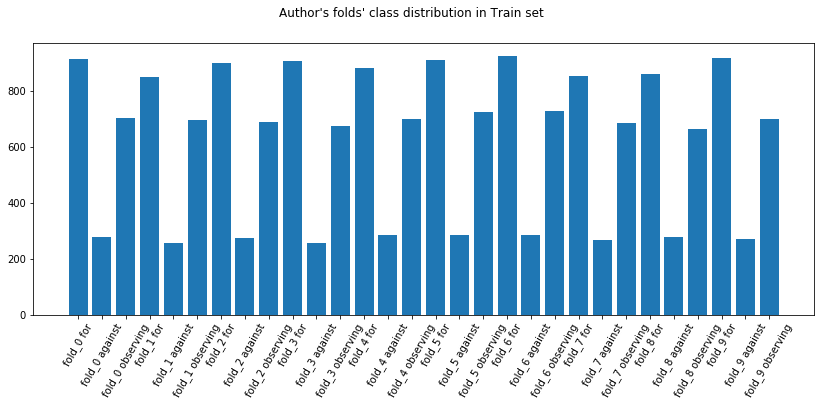

['observing' 'for' 'for' ... 'for' 'for' 'for']


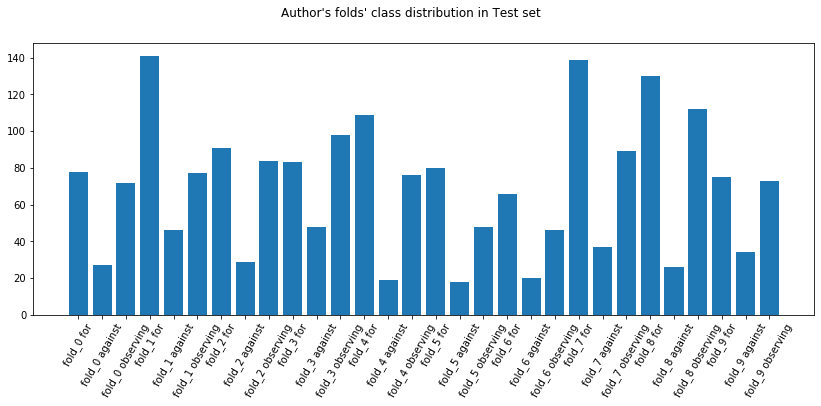

In [11]:
height = []
bars = []
for i in range(10):
    bars.append("fold_"+str(i)+" for")
    height.append(np.count_nonzero(Y_folds[i]== "for"))
    bars.append("fold_"+str(i)+" against")
    height.append(np.count_nonzero(Y_folds[i]== "against"))
    bars.append("fold_"+str(i)+" observing")
    height.append(np.count_nonzero(Y_folds[i]== "observing"))

fig = plt.figure(figsize=(14,5))
fig.suptitle('Author\'s folds\' class distribution in Train set')
plt.bar(range(1,31), height)
plt.xticks(range(1,31), bars, rotation=60)
plt.show()
print(Y_folds[i])


height = []
bars = []
for i in range(10):
    bars.append("fold_"+str(i)+" for")
    height.append(np.count_nonzero(Y_folds_test[i]== "for"))
    bars.append("fold_"+str(i)+" against")
    height.append(np.count_nonzero(Y_folds_test[i]== "against"))
    bars.append("fold_"+str(i)+" observing")
    height.append(np.count_nonzero(Y_folds_test[i]== "observing"))

fig = plt.figure(figsize=(14,5))
fig.suptitle('Author\'s folds\' class distribution in Test set')
plt.bar(range(1,31), height)
plt.xticks(range(1,31), bars, rotation=60)
plt.show()

In [155]:
#create 10 stratified folds

train_for = train[train.articleHeadlineStance == "for"].to_numpy()
train_against = train[train.articleHeadlineStance == "against"].to_numpy()
train_observing = train[train.articleHeadlineStance == "observing"].to_numpy()

fold_size_per_class = int(train_for.shape[0] / 10) # fold_size_per_class per class
fold_size = fold_size_per_class * 3

fold_test_size = int(fold_size * 0.2) # test size = 20%

print("fold_size_per_class = \t" + str(fold_size_per_class))
print("fold_size = \t" + str(fold_size))

print("for size = \t" + str(train_for.shape[0]) + "\t repeat after # folds = " + str(int(train_for.shape[0] / fold_size_per_class)))
print("against size = \t" + str(train_against.shape[0]) + "\t repeat after # folds = " + str(int(train_against.shape[0] / fold_size_per_class)))
print("observing size= " + str(train_observing.shape[0]) + "\t repeat after # folds = " + str(int(train_observing.shape[0] / fold_size_per_class)))


## making stratified folds
X_strat_folds = []
Y_strat_folds = []

X_strat_folds_test = []
Y_strat_folds_test = []

gc.collect()

print("\n")
for_i = 0
against_i = 0
observing_i = 0
for i in range(10):
    fold = np.array([])
    
    # add for class samples
    start = int(for_i*fold_size_per_class)
    end = int(for_i*fold_size_per_class + fold_size_per_class)
    fold = train_for[start:end]
    
    # add against class samples
    start = int(against_i*fold_size_per_class)
    end = int(against_i*fold_size_per_class + fold_size_per_class)
    if end > (train_against.shape[0]):
        against_i = 0
        start = int(against_i*fold_size_per_class)
        end = int(against_i*fold_size_per_class + fold_size_per_class)
        
    
    fold = np.append(fold, train_against[start:end], axis=0)
    
    # add observing class samples
    start = int(observing_i*fold_size_per_class)
    end = int(observing_i*fold_size_per_class + fold_size_per_class)
    if end > (train_observing.shape[0]) :
        observing_i = 0
        start = int(observing_i*fold_size_per_class)
        end = int(observing_i*fold_size_per_class + fold_size_per_class)
    
    fold = np.append(fold, train_observing[start:end], axis=0)
    
    
    for_i = for_i + 1
    against_i = against_i + 1
    observing_i = observing_i + 1
    
    fold = sklearn.utils.shuffle(fold)
    # add fold to X and Y
    X_strat_folds.append(fold[0:fold_size-fold_test_size, 5:])
    Y_strat_folds.append(fold[0:fold_size-fold_test_size, 2].reshape((-1,)))
    
    X_strat_folds_test.append(fold[fold_size-fold_test_size :, 5:])
    Y_strat_folds_test.append(fold[fold_size-fold_test_size :, 2].reshape((-1,)))
    
print("X_strat_folds shape =  " + str(np.shape(X_strat_folds)))
print("Y_strat_folds shape =  " + str(np.shape(Y_strat_folds)))
print("X_strat_folds_test shape =  " + str(np.shape(X_strat_folds_test)))
print("Y_strat_folds_test shape =  " + str(np.shape(Y_strat_folds_test)))
    


fold_size_per_class = 	99
fold_size = 	297
for size = 	992	 repeat after # folds = 10
against size = 	304	 repeat after # folds = 3
observing size= 775	 repeat after # folds = 7


X_strat_folds shape =  (10,)
Y_strat_folds shape =  (10,)
X_strat_folds_test shape =  (1, 182, 20552)
Y_strat_folds_test shape =  (10,)


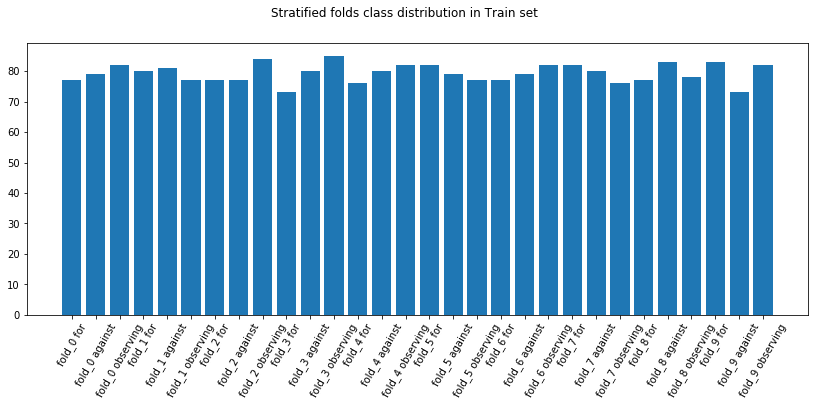

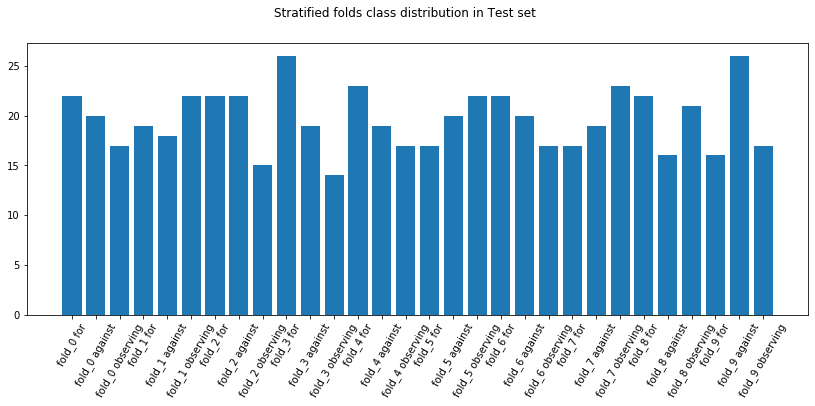

In [153]:
height = []
bars = []
for i in range(10):
    bars.append("fold_"+str(i)+" for")
    height.append(np.count_nonzero(Y_strat_folds[i]== "for"))
    bars.append("fold_"+str(i)+" against")
    height.append(np.count_nonzero(Y_strat_folds[i]== "against"))
    bars.append("fold_"+str(i)+" observing")
    height.append(np.count_nonzero(Y_strat_folds[i]== "observing"))

fig = plt.figure(figsize=(14,5))
fig.suptitle('Stratified folds class distribution in Train set')
plt.bar(range(1,31), height)
plt.xticks(range(1,31), bars, rotation=60)
plt.show()


height = []
bars = []
for i in range(10):
    bars.append("fold_"+str(i)+" for")
    height.append(np.count_nonzero(Y_strat_folds_test[i]== "for"))
    bars.append("fold_"+str(i)+" against")
    height.append(np.count_nonzero(Y_strat_folds_test[i]== "against"))
    bars.append("fold_"+str(i)+" observing")
    height.append(np.count_nonzero(Y_strat_folds_test[i]== "observing"))

fig = plt.figure(figsize=(14,5))
fig.suptitle('Stratified folds class distribution in Test set')
plt.bar(range(1,31), height)
plt.xticks(range(1,31), bars, rotation=60)
plt.show()

In [12]:
max_iter = 10e2
C=1.0
penalty='l2'

In [13]:
# Normal Train and Test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=penalty, C=C, max_iter = max_iter)

soln = model.fit(X_train,Y_train)

print("train_acc = " + str(soln.score(X_train,Y_train))) # train accuracy
print("test_acc = " + str(soln.score(X_test,Y_test) ))# train accuracy

train_acc = 0.9980685659101883
test_acc = 0.6908396946564885


In [14]:
# Train on folds
from sklearn.linear_model import LogisticRegression

fold_train_acc = []
fold_test_acc = []
indep_test_acc = []

for i in range(10):
    model = LogisticRegression(penalty=penalty, C=C, max_iter = max_iter)
    soln = model.fit(X_folds[i], Y_folds[i])
    
    fold_train_acc = np.append(fold_train_acc, soln.score(X_folds[i], Y_folds[i]))
    fold_test_acc = np.append(fold_test_acc, soln.score(X_folds_test[i], Y_folds_test[i]))
    indep_test_acc = np.append(indep_test_acc, soln.score(X_test, Y_test))
    print("completed fold => "+ str(i+1))
 

completed fold => 1
completed fold => 2
completed fold => 3
completed fold => 4
completed fold => 5
completed fold => 6
completed fold => 7
completed fold => 8
completed fold => 9
completed fold => 10


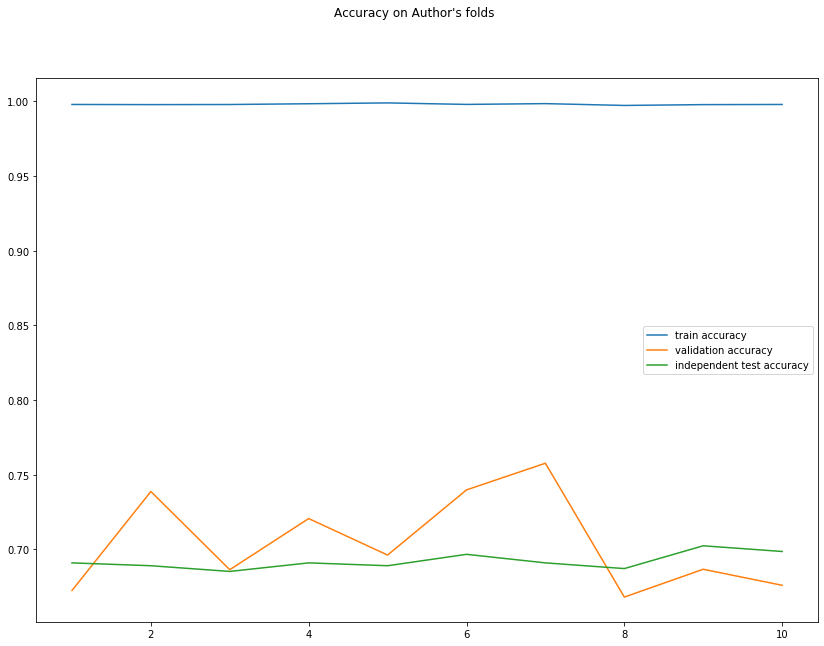

In [17]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('Accuracy on Author\'s folds')
plt.plot(range(1,11), fold_train_acc, label="train accuracy" )
plt.plot(range(1,11), fold_test_acc, label="validation accuracy" )
plt.plot(range(1,11), indep_test_acc, label="independent test accuracy" )
plt.legend()
plt.show()

In [126]:
# train on STRATIFIED folds
from sklearn.linear_model import LogisticRegression

fold_train_acc = []
fold_test_acc = []
indep_test_acc = []

for i in range(10):
    model = LogisticRegression(penalty=penalty, C=C, max_iter = max_iter)
    soln = model.fit(X_strat_folds[i], Y_strat_folds[i])
    
    fold_train_acc = np.append(fold_train_acc, soln.score(X_strat_folds[i], Y_strat_folds[i]))
    fold_test_acc = np.append(fold_test_acc, soln.score(X_strat_folds_test[i], Y_strat_folds_test[i]))
    indep_test_acc = np.append(indep_test_acc, soln.score(X_test, Y_test))
    print("completed fold => "+ str(i+1))
    


completed fold => 1
completed fold => 2
completed fold => 3
completed fold => 4
completed fold => 5
completed fold => 6
completed fold => 7
completed fold => 8
completed fold => 9
completed fold => 10


<function matplotlib.pyplot.show(*args, **kw)>

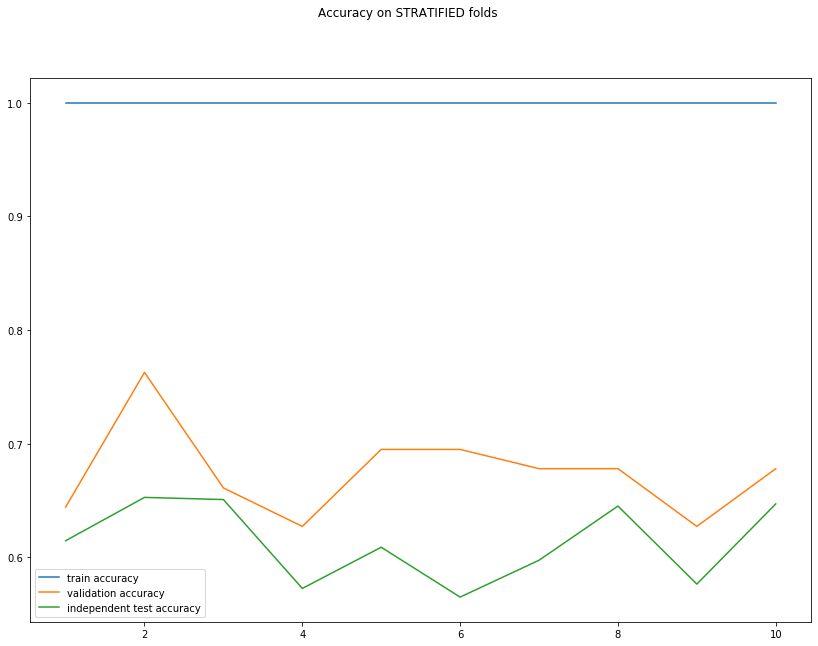

In [116]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('Accuracy on STRATIFIED folds')
plt.plot(range(1,11), fold_train_acc, label="train accuracy" )
plt.plot(range(1,11), fold_test_acc, label="validation accuracy" )
plt.plot(range(1,11), indep_test_acc, label="independent test accuracy" )
plt.legend()
plt.show

In [117]:
print(indep_test_acc)

[0.61450382 0.65267176 0.65076336 0.57251908 0.60877863 0.5648855
 0.59732824 0.64503817 0.57633588 0.64694656]
